# 03 - Diarização

    O objetivo deste pré-processamento é gerar a diarização do áudio.

## Segmentar o áudio

In [46]:
from pydub import AudioSegment

#spacermilli = 2000
#spacer = AudioSegment.silent(duration=spacermilli)
audio = AudioSegment.from_wav("youtube.wav") #lecun1.wav
#audio = spacer.append(audio, crossfade=0)
audio.export('audio.wav', format='wav')

<_io.BufferedRandom name='audio.wav'>

## Gerar a diarização

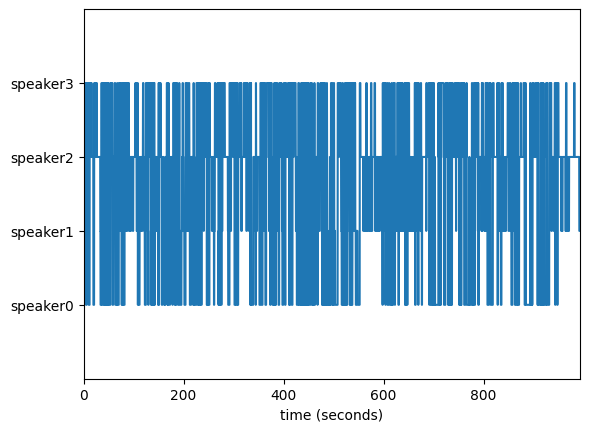

In [59]:
from pyAudioAnalysis import audioSegmentation

segments = audioSegmentation.speaker_diarization(
    filename='./audio.wav', 
    n_speakers=4,
    mid_window=1,
    mid_step=0.1,    
    plot_res=True)


## Gerar dados por segundo

In [122]:
from collections import Counter

slots = int((len(segments[0]) + (len(segments[0]) % 10)) / 10)
slots_segments = [[el for el in segments[0][(slot * 10):(slot * 10) + 10]] for slot in range(slots)]
segments_by_seconds = [Counter(seg).most_common(1)[0][0] for seg in slots_segments]
segments_labels = { 0: "João", 1: "Pedro", 2: "Marcos", 3: "Paulo" }

segments_data = {
    "labels": segments_labels,
    "diarization": segments_by_seconds
}



## Gravar os dados para consumo

In [125]:
import pickle as pkl

with open('./bot/data/diarization.pkl', '+wb') as file:
    pkl.dump(segments_data, file)